# PCA - Principal Component Analisys - Redução de Dimensionalidade

## Passos Principais - PCA -  principal component analysis

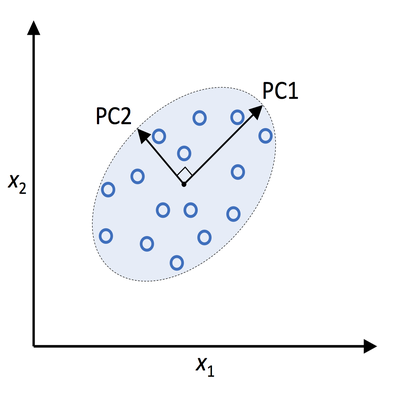

In [1]:
from PIL import Image
img = Image.open('image01.png') #, width=400) 
width  = 400
height = 400
img = img.resize((width, height), Image.ANTIALIAS)
img

## Extraindo os componentes principais passo-a-passo 

In [2]:
import pandas as pd

df_wine = pd.read_csv('wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
print('Número de dimensões:', len(df_wine.columns))

Número de dimensões: 14


In [3]:
# conta o número de ocorrencia de cada classe
df_wine['Class label'].value_counts()

2    71
1    59
3    48
Name: Class label, dtype: int64

### Splitting de dados: 70% treino e 30% teste

In [5]:
from sklearn.model_selection import train_test_split

X= df_wine.iloc[:, 1:].values 
y = df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0)

In [6]:
X_train[:3]

array([[1.362e+01, 4.950e+00, 2.350e+00, 2.000e+01, 9.200e+01, 2.000e+00,
        8.000e-01, 4.700e-01, 1.020e+00, 4.400e+00, 9.100e-01, 2.050e+00,
        5.500e+02],
       [1.376e+01, 1.530e+00, 2.700e+00, 1.950e+01, 1.320e+02, 2.950e+00,
        2.740e+00, 5.000e-01, 1.350e+00, 5.400e+00, 1.250e+00, 3.000e+00,
        1.235e+03],
       [1.373e+01, 1.500e+00, 2.700e+00, 2.250e+01, 1.010e+02, 3.000e+00,
        3.250e+00, 2.900e-01, 2.380e+00, 5.700e+00, 1.190e+00, 2.710e+00,
        1.285e+03]])

In [7]:
y_train[:3]

array([3, 1, 1])

### Colocando o dado em Escala (Normalizando)

In [8]:
X_train.min(), X_train.max()

(0.13, 1680.0)

In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [10]:
X_train_std[:3]

array([[ 0.71225893,  2.22048673, -0.13025864,  0.05962872, -0.50432733,
        -0.52831584, -1.24000033,  0.84118003, -1.05215112, -0.29218864,
        -0.20017028, -0.82164144, -0.62946362],
       [ 0.88229214, -0.70457155,  1.17533605, -0.09065504,  2.34147876,
         1.01675879,  0.66299475,  1.0887425 , -0.49293533,  0.13152077,
         1.33982592,  0.54931269,  1.47568796],
       [ 0.84585645, -0.73022996,  1.17533605,  0.81104754,  0.13597904,
         1.09807851,  1.16326665, -0.64419483,  1.25249578,  0.25863359,
         1.06806189,  0.1308109 ,  1.62934866]])

In [11]:
X_train_std.min(), X_train_std.max()

(-2.55493448916567, 3.6932366525105946)

## A matriz de  covariância
Covariância, ou variância conjunta, é uma medida do grau de interdependência (ou inter-relação) numérica entre duas variáveis aleatórias. 
Assim, variáveis independentes têm covariância zero. <br />
A covariância é por vezes chamada de medida de dependência linear entre as duas variáveis aleatórias. <br />
O Coeficiente de Correlação Linear é um conceito relacionado usado para medir o grau de dependência linear entre duas variáveis, variando entre -1 e 1, indicando o sentido da dependência.

In [12]:
import numpy as np
cov_mat = np.cov(X_train_std.T)

In [13]:
cov_mat

array([[ 1.00813008,  0.06709556,  0.17405351, -0.35439069,  0.26374703,
         0.29079481,  0.21835807, -0.08111974,  0.10436705,  0.54282846,
         0.05893536, -0.01797029,  0.6415292 ],
       [ 0.06709556,  1.00813008,  0.08326463,  0.26356776, -0.11349172,
        -0.33735555, -0.41035281,  0.33653916, -0.21602672,  0.17504154,
        -0.551593  , -0.40561695, -0.24089991],
       [ 0.17405351,  0.08326463,  1.00813008,  0.46420355,  0.29092834,
         0.18020384,  0.15537535,  0.15918823, -0.00703776,  0.20549146,
         0.00665422,  0.02039019,  0.223495  ],
       [-0.35439069,  0.26356776,  0.46420355,  1.00813008, -0.07406447,
        -0.28060672, -0.31391899,  0.31581353, -0.24621059, -0.08872685,
        -0.22595587, -0.16799906, -0.46393412],
       [ 0.26374703, -0.11349172,  0.29092834, -0.07406447,  1.00813008,
         0.25667578,  0.21025773, -0.26003426,  0.19601657,  0.20606456,
         0.13359768,  0.06633258,  0.41810999],
       [ 0.29079481, -0.337355

## Decomposição da matriz de covariância em AutoVetores (eingenvectors)

OS eigenvectors (Autovetores) da matriz de covariância, representam os Componentes Principais, que são as direções de máxima variância.<br />
Os eingenvalues, que são os Autovalores, são valores associados com os Autovetores v.

In [14]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


In [15]:
print('\nEigenvecs \n%s' % eigen_vecs)


Eigenvecs 
[[-1.37242175e-01  5.03034778e-01 -1.37748734e-01 -3.29610003e-03
  -2.90625226e-01  2.99096847e-01  7.90529293e-02 -3.68176414e-01
  -3.98377017e-01 -9.44869777e-02  3.74638877e-01 -1.27834515e-01
   2.62834263e-01]
 [ 2.47243265e-01  1.64871190e-01  9.61503863e-02  5.62646692e-01
   8.95378697e-02  6.27036396e-01 -2.74002014e-01 -1.25775752e-02
   1.10458230e-01  2.63652406e-02 -1.37405597e-01  8.06401578e-02
  -2.66769211e-01]
 [-2.54515927e-02  2.44564761e-01  6.77775667e-01 -1.08977111e-01
  -1.60834991e-01  3.89128239e-04  1.32328045e-01  1.77578177e-01
   3.82496856e-01  1.42747511e-01  4.61583035e-01  1.67924873e-02
  -1.15542548e-01]
 [ 2.06945084e-01 -1.13529045e-01  6.25040550e-01  3.38187002e-02
   5.15873402e-02 -4.05836452e-02  2.23999097e-01 -4.40592110e-01
  -2.43373853e-01 -1.30485780e-01 -4.18953989e-01 -1.10845657e-01
   1.99483410e-01]
 [-1.54365821e-01  2.89745182e-01  1.96135481e-01 -3.67511070e-01
   6.76487073e-01  6.57772614e-02 -4.05268966e-01  1.1

## Total e variância explicada 

In [16]:
tot = sum(eigen_vals)
tot

13.105691056910567

In [17]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
print("variância explicade de cada componente\n", var_exp)

variância explicade de cada componente
 [0.3695146859960764, 0.18434927059884154, 0.11815159094596986, 0.0733425176378548, 0.0642210782173167, 0.05051724484907664, 0.039546538912414456, 0.026439183169220025, 0.023893192591852887, 0.01629613773725101, 0.013800211221948416, 0.01172226244308601, 0.008206085679091361]


In [18]:
sum(var_exp)

1.0

In [19]:
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([0.36951469, 0.55386396, 0.67201555, 0.74535807, 0.80957914,
       0.86009639, 0.89964293, 0.92608211, 0.9499753 , 0.96627144,
       0.98007165, 0.99179391, 1.        ])

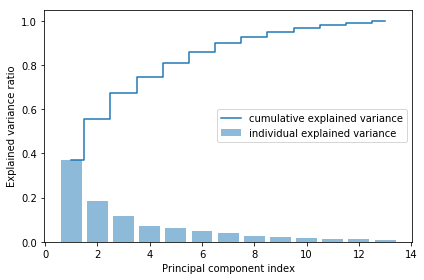

In [21]:
import matplotlib.pyplot as plt

plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Feature transformation - Criação de pares (AutoValores, AutoVetores)

In [22]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [23]:
eigen_pairs[:2]

[(4.842745315655895,
  array([-0.13724218,  0.24724326, -0.02545159,  0.20694508, -0.15436582,
         -0.39376952, -0.41735106,  0.30572896, -0.30668347,  0.07554066,
         -0.32613263, -0.36861022, -0.29669651])),
 (2.4160245870352237,
  array([ 0.50303478,  0.16487119,  0.24456476, -0.11352904,  0.28974518,
          0.05080104, -0.02287338,  0.09048885,  0.00835233,  0.54977581,
         -0.20716433, -0.24902536,  0.38022942]))]

## Matriz de transformação w 

In [24]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix Transformação W:\n', w)

Matrix Transformação W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [25]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

## tranformando 13 dimensões (atributos) em 2 dimensões

In [26]:
X_train_pca = X_train_std.dot(w)
X_train_pca[:5]

array([[ 2.38299011,  0.45458499],
       [-1.96578183,  1.65376939],
       [-2.53907598,  1.02909066],
       [-1.43010776,  0.6024011 ],
       [ 3.14147227,  0.66214979]])

## Plotando as 2 dimensões (PC1, PC2) e os classes (labels)

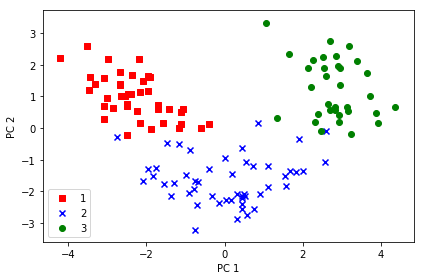

In [27]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

## Principal component analysis (Pacote scikit-learn)

In [28]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
print("Variância explicada\n",pca.explained_variance_ratio_)

Variância explicada
 [0.36951469 0.18434927 0.11815159 0.07334252 0.06422108 0.05051724
 0.03954654 0.02643918 0.02389319 0.01629614 0.01380021 0.01172226
 0.00820609]


In [29]:
np.sum(pca.explained_variance_ratio_)

1.0000000000000002

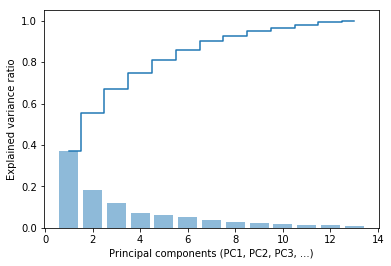

In [30]:
import matplotlib.pyplot as plt
import numpy as np

plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components (PC1, PC2, PC3, ...)')

plt.show()

## PCA - transformando em 2 componentes

In [31]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
print('Variância Explicada:\nPC1 = ',pca.explained_variance_ratio_[0], ', PC2 = ',pca.explained_variance_ratio_[1])

Variância Explicada:
PC1 =  0.36951468599607695 , PC2 =  0.184349270598841


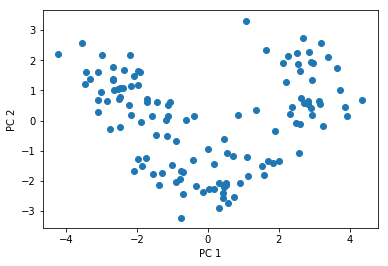

In [32]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [33]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend(loc='lower left')
    plt.tight_layout()

## Treinando um Classificador de Regressão Logística - 2 Componentes Principais (PC1, PC2) 

In [34]:
from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)

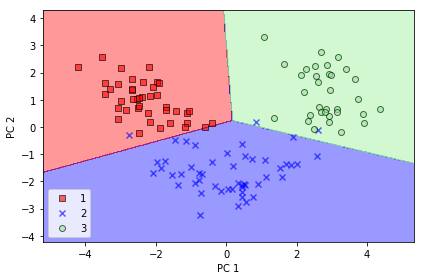

In [35]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.show()

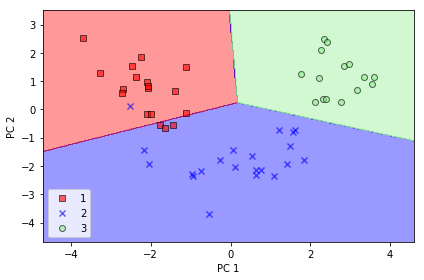

In [36]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
#plt.xlabel('PC 1')
#plt.ylabel('PC 2')
#plt.legend(loc='lower left')
#plt.tight_layout()
# plt.savefig('images/05_05.png', dpi=300)
plt.show()

In [37]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

<br>
<br>

# Kernel PCA para mapeamento não-linear

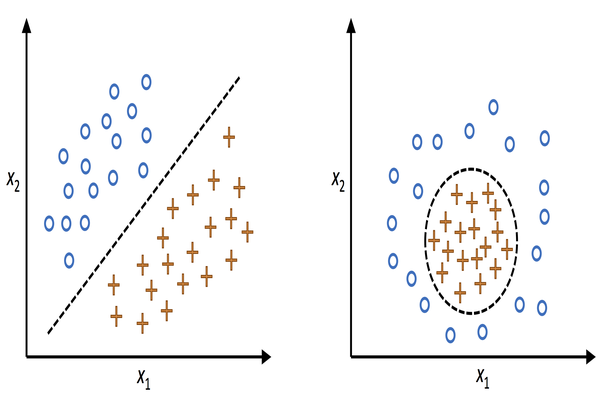

In [38]:
img = Image.open('image02.png')
width  = 600
height = 400
img = img.resize((width, height), Image.ANTIALIAS)
img

## Kernel principal component analysis (KPCA) no scikit-learn

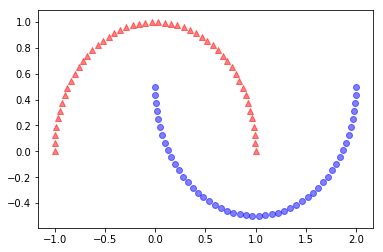

In [39]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, random_state=123)

plt.scatter(X[y == 0, 0], X[y == 0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1],
            color='blue', marker='o', alpha=0.5)

## Usando o KPCA para a separação não-linear

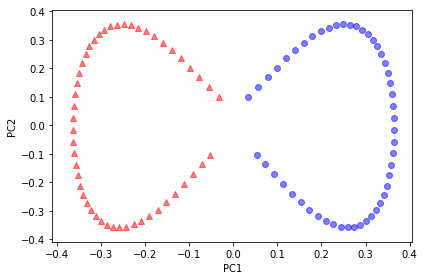

In [40]:
from sklearn.decomposition import KernelPCA

X, y = make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

plt.scatter(X_skernpca[y == 0, 0], X_skernpca[y == 0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y == 1, 0], X_skernpca[y == 1, 1],
            color='blue', marker='o', alpha=0.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
# plt.savefig('images/05_19.png', dpi=300)
plt.show()

In [41]:
scikit_kpca

KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=15, kernel='rbf',
     kernel_params=None, max_iter=None, n_components=2, n_jobs=1,
     random_state=None, remove_zero_eig=False, tol=0)

# PCA - Consumo de Alimentos no Reino Unido

In [42]:
import pandas as pd

In [44]:
dfUK = pd.read_excel('Food.xlsx')
df = dfUK.copy()
df

,FoodConsumption,England,Wales,Scotland,N_Ireland
0,Cheese,105,103,103,66
1,Carcass meat,245,227,242,267
2,Other meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats and oils,193,235,184,209
5,Sugars,156,175,147,139
6,Fresh potatoes,720,874,566,1033
7,Fresh Veg,253,265,171,143
8,Other Veg,488,570,418,355
9,Processed potatoes,198,203,220,187


In [45]:
foods = df['FoodConsumption']
foods = foods.values
foods

array(['Cheese', 'Carcass meat', 'Other meat', 'Fish', 'Fats and oils',
       'Sugars', 'Fresh potatoes', 'Fresh Veg', 'Other Veg',
       'Processed potatoes', 'Processed Veg', 'Fresh fruit', 'Cereals',
       'Beverages', 'Soft drinks', 'Alcoholic drinks', 'Confectionery'],
      dtype=object)

In [46]:
len(foods)

17

In [47]:
del df['FoodConsumption']
df

,England,Wales,Scotland,N_Ireland
0,105,103,103,66
1,245,227,242,267
2,685,803,750,586
3,147,160,122,93
4,193,235,184,209
5,156,175,147,139
6,720,874,566,1033
7,253,265,171,143
8,488,570,418,355
9,198,203,220,187


In [48]:
countries = df.columns
countries

Index(['England', 'Wales', 'Scotland', 'N_Ireland'], dtype='object')

### Obtem a matriz transporta para manipulação dos dados

In [52]:
df2 = df.T
df2.columns = foods
df2

,Cheese,Carcass meat,Other meat,Fish,Fats and oils,Sugars,Fresh potatoes,Fresh Veg,Other Veg,Processed potatoes,Processed Veg,Fresh fruit,Cereals,Beverages,Soft drinks,Alcoholic drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N_Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [53]:
df2.columns

Index(['Cheese', 'Carcass meat', 'Other meat', 'Fish', 'Fats and oils',
       'Sugars', 'Fresh potatoes', 'Fresh Veg', 'Other Veg',
       'Processed potatoes', 'Processed Veg', 'Fresh fruit', 'Cereals',
       'Beverages', 'Soft drinks', 'Alcoholic drinks', 'Confectionery'],
      dtype='object')

In [54]:
data = df2.values
data

array([[ 105,  245,  685,  147,  193,  156,  720,  253,  488,  198,  360,
        1102, 1472,   57, 1374,  375,   54],
       [ 103,  227,  803,  160,  235,  175,  874,  265,  570,  203,  365,
        1137, 1582,   73, 1256,  475,   64],
       [ 103,  242,  750,  122,  184,  147,  566,  171,  418,  220,  337,
         957, 1462,   53, 1572,  458,   62],
       [  66,  267,  586,   93,  209,  139, 1033,  143,  355,  187,  334,
         674, 1494,   47, 1506,  135,   41]])

## colocar os dados em escala

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(data.astype(float))
X_std

array([[ 0.65827466, -0.01749546, -0.25954622,  0.64458535, -0.63242919,
         0.13055067, -0.45007561,  0.86331183,  0.37773603, -0.33626508,
         0.80547723,  0.73740709, -0.64432226, -0.05191741, -0.43523112,
         0.10499766, -0.13830319],
       [ 0.53580495, -1.27716878,  1.19885635,  1.15244047,  1.53589947,
         1.54795798,  0.43569619,  1.09352832,  1.40168163,  0.08406627,
         1.17160324,  0.9292974 ,  1.67946294,  1.60943981, -1.40423624,
         0.84182336,  0.96812236],
       [ 0.53580495, -0.22744102,  0.54381113, -0.33205912, -1.09707105,
        -0.54085279, -1.33584741, -0.70983418, -0.49636387,  1.51319287,
        -0.87870243, -0.0575671 , -0.85557546, -0.46725672,  1.19072664,
         0.71656299,  0.74683725],
       [-1.72988456,  1.52210526, -1.48312126, -1.4649667 ,  0.19360077,
        -1.13765587,  1.35022682, -1.24700598, -1.28305378, -1.26099406,
        -1.09837804, -1.60913739, -0.17956522, -1.09026568,  0.64874072,
        -1.66338402

## PCA - Converter 17 dimensões (atributos) em 1 dimensão

In [56]:
from sklearn.decomposition import PCA
pca = PCA(1) # somente 1 dimensão
X_std = data
X_pca = pca.fit_transform(X_std)
print('Variância Explicada:\n', pca.explained_variance_ratio_)

Variância Explicada:
 [0.67444346]


In [57]:
X_pca

array([[-144.99315218],
       [-240.52914764],
       [ -91.869339  ],
       [ 477.39163882]])

In [58]:
dfpca = pd.DataFrame() 
dfpca['PC1'] = X_pca.ravel()
dfpca['Country'] = countries
dfpca

,PC1,Country
0,-144.993152,England
1,-240.529148,Wales
2,-91.869339,Scotland
3,477.391639,N_Ireland


In [59]:
dfpca2 = dfpca.sort_values('PC1')
dfpca2 = dfpca2.reset_index(drop=True)
dfpca2

,PC1,Country
0,-240.529148,Wales
1,-144.993152,England
2,-91.869339,Scotland
3,477.391639,N_Ireland


## Plota 

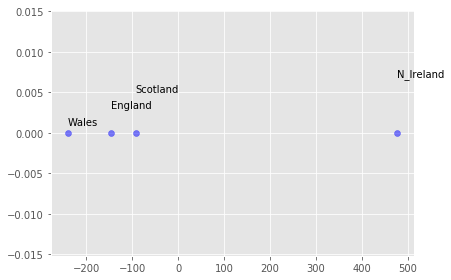

In [69]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
plt.scatter(dfpca2.PC1, np.zeros(len(dfpca)), color='blue', marker='o', alpha=0.5)
y = 0.001 
for i in range(len(dfpca2)):
    country = dfpca2.loc[i,'Country']
    x = dfpca2.loc[i,'PC1']
    plt.annotate(country, (x,y))
    y += 0.002
plt.tight_layout()
plt.show()

Analizando o PC1 e o PC2, vemos que A Irlanda do Norte tem um comportamente de outlier (padrão fora da média). <br />
Se olharmos a tabela, perceberemos que a Irlanda do Norte tem um maior consumo de Batatas e consumos mais baixos em frutas, queijo, peixe e bebidas. <br />
Pode ser devido a um fato geográfico: A Irlanda do Norte é o único país do UK, que está fora da Grande Ilha do Reino Unido.

In [61]:
dfUK.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
FoodConsumption,Cheese,Carcass meat,Other meat,Fish,Fats and oils,Sugars,Fresh potatoes,Fresh Veg,Other Veg,Processed potatoes,Processed Veg,Fresh fruit,Cereals,Beverages,Soft drinks,Alcoholic drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N_Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


## PCA - Converter 17 dimensões (atributos) em 2 dimensões

In [62]:
from sklearn.decomposition import PCA
pca = PCA(2) # somente 2 dimensõ
X_std = data
X_pca = pca.fit_transform(X_std)
print(pca.explained_variance_ratio_)

[0.67444346 0.29052475]


In [63]:
X_pca

array([[-144.99315218,   -2.53299944],
       [-240.52914764, -224.64692488],
       [ -91.869339  ,  286.08178613],
       [ 477.39163882,  -58.90186182]])

In [64]:
X_pca[:, 0]

array([-144.99315218, -240.52914764,  -91.869339  ,  477.39163882])

In [65]:
dfpca['Country'] = countries
dfpca['PC1'] = X_pca[:, 0]
dfpca['PC2'] = X_pca[:, 1]
dfpca

,PC1,Country,PC2
0,-144.993152,England,-2.532999
1,-240.529148,Wales,-224.646925
2,-91.869339,Scotland,286.081786
3,477.391639,N_Ireland,-58.901862


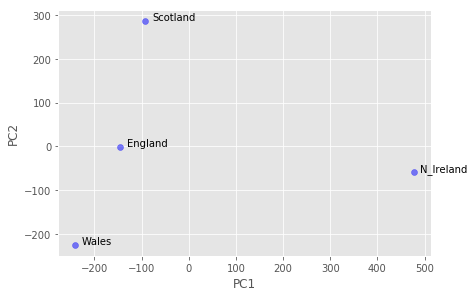

In [68]:
plt.style.use('ggplot')
plt.scatter(dfpca.PC1, dfpca.PC2, color='blue', marker='o', alpha=0.5) 
for i in range(len(dfpca2)):
    country = dfpca.loc[i,'Country']
    x = dfpca.loc[i,'PC1'] + 14
    y = dfpca.loc[i,'PC2'] + 2
    plt.annotate(country, (x,y))
plt.tight_layout()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()